# Pseudospectra of matrices

The idea is based on [1], the pseudospectra around the complex number
$z$ is found as
  
$$\sigma_\min(A - zI)$$
     
the minimum singular value of $(A - zI)$.

## References
 - [1]: L.N. Trefethen. Pseudospectra of matrices.

In [1]:
from __future__ import division
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import svds, eigs
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
def pseudo_spec(x, y, mat_A):
    """Compute the pseudospectra of `mat_A` around the point $x + iy"""
    ps_spec = np.zeros_like(x)
    for row in range(npts):
        for col in range(npts):
            z_num = x[row, col] + 1j*y[row, col]
            sv_min = np.min(svds((mat_A - z_num*np.eye(N)), k=10, which='SM', 
                                        return_singular_vectors=False))
            ps_spec[row, col] = sv_min
        
    return ps_spec



In [4]:
def plot_pseudo_spec(x, y, mat_A, ps_spec, levels=8):
    """Plot the pseudospectra and eigenvalues for matrix `mat_A`"""
    n_eigs = np.shape(mat_A)[0] - 2    
    vals = eigs(mat_A, k=n_eigs, which='SM', return_eigenvectors=False)
    ps_spec[np.isnan(ps_spec)] = 0
    plt.plot(np.real(vals), np.imag(vals), 'k.')
    plt.contourf(x, y, ps_spec, levels, cmap="YlGnBu_r")
    C = plt.contour(x, y, ps_spec, levels, colors='k')
    plt.axis('image')
    
    return C

In [5]:
npts = 51
N = 200

## 1. Jordan block

$$A_1 = \begin{pmatrix}
	0 & 1 &  &  &  & \\ 
	 & 0 & 1 &  &  & \\ 
	 &  & 0 & 1 &  & \\ 
	 &  &  & 0 & 1 & \\ 
	 &  &  &  & 0 & 1\\ 
	 &  &  &  &  & 0
\end{pmatrix}$$

In [6]:
x1, y1 = np.mgrid[-1:1:npts*1j, -1:1:npts*1j]
A1 = diags([1.], [1], shape=(N, N))

In [7]:
ps_spec1 = pseudo_spec(x1, y1, A1)

C:\Anaconda2\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1793: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(eigvals)


<IPython.core.display.Javascript object>


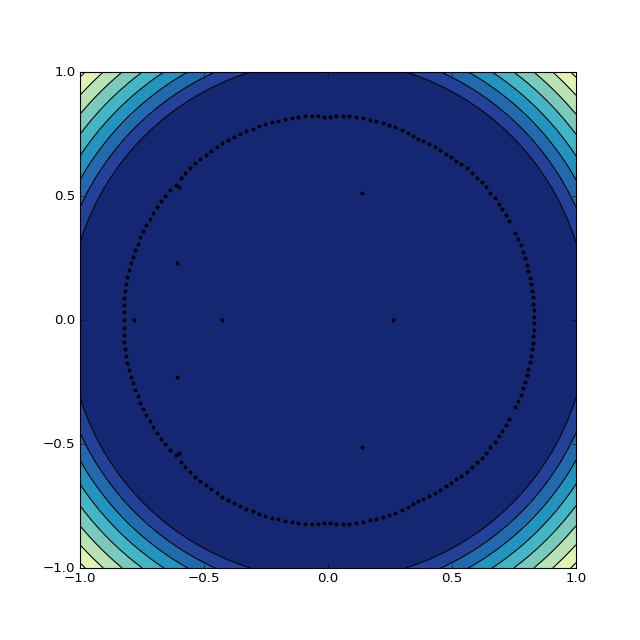

In [8]:
plt.figure(figsize=(8,8))
plot_pseudo_spec(x1, y1, A1, ps_spec1)
plt.show()

## 2. Limacon

$$A_2 = \begin{pmatrix}
	0 & 1 & 1 &  &  & \\ 
	 & 0 & 1 & 1 &  & \\ 
	 &  & 0 & 1 & 1 & \\ 
	 &  &  & 0 & 1 & 1\\ 
	 &  &  &  & 0 & 1\\ 
	 &  &  &  &  & 0
\end{pmatrix}$$

In [9]:
x2, y2 = np.mgrid[-2:2:npts*1j, -2:2:npts*1j]
A2 = diags([1.], [1], shape=(N, N))

In [10]:
ps_spec2 = pseudo_spec(x2, y2, A2)

<IPython.core.display.Javascript object>


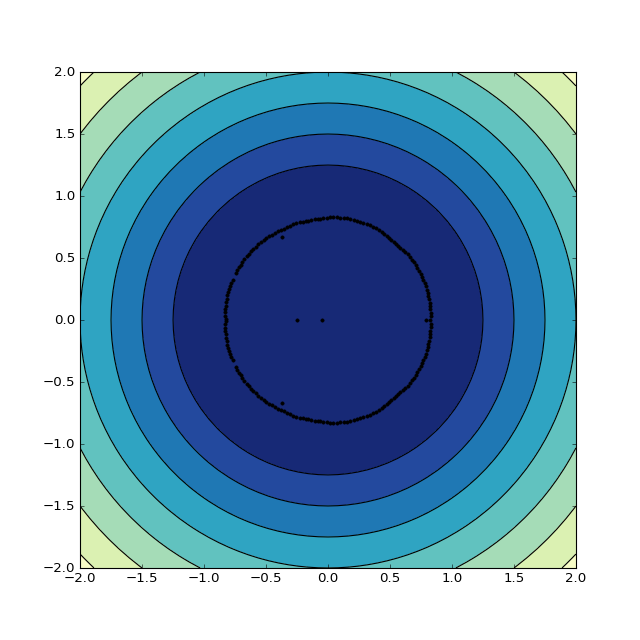

In [11]:
plt.figure(figsize=(8,8))
plot_pseudo_spec(x2, y2, A2, ps_spec2)
plt.show()

## 3. Grcar matrix

The matrix looks like

$$A_3 = \begin{pmatrix}
	1 & 1 & 1 & 1 &  & \\ 
	-1 & 1 & 1 & 1 & 1 & \\ 
	 & -1 & 1 & 1 & 1 & 1\\ 
	 &  & -1 & 1 & 1 & 1\\ 
	 &  &  & -1 & 1 & 1\\ 
	 &  &  &  & 1 & 1
\end{pmatrix}$$

In [12]:
x3, y3 = np.mgrid[-4:4:npts*1j, -4:4:npts*1j]
A3 = diags([-1., 1., 1., 1, 1], [-1, 0, 1, 2, 3], shape=(N, N))

In [13]:
ps_spec3 = pseudo_spec(x3, y3, A3)

<IPython.core.display.Javascript object>


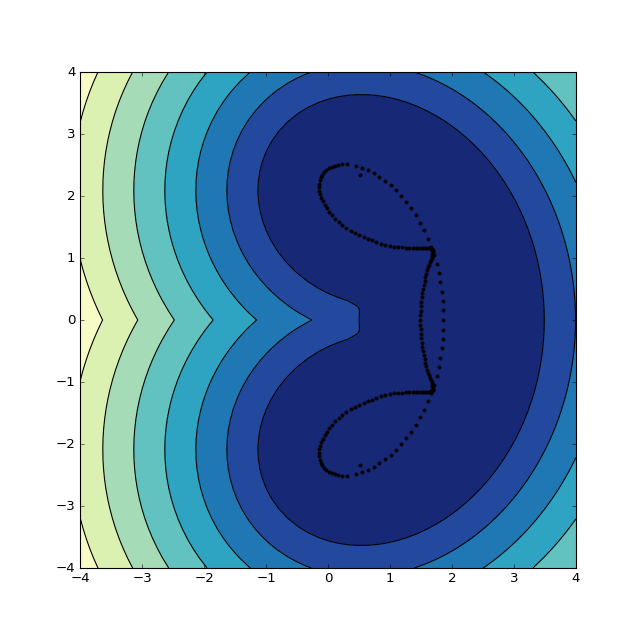

In [14]:
plt.figure(figsize=(8,8))
plot_pseudo_spec(x3, y3, A3, ps_spec3)
plt.show()

## 4. Wilkinson matrix

$$A_4 = \begin{pmatrix}
	\frac{1}{N} & 1 &  &  &  & \\ 
	& \frac{2}{N} & 1 &  &  & \\ 
	&  & \frac{3}{N} & 1 &  & \\ 
	&  &  & \frac{4}{N} & 1 & \\ 
	&  &  &  & \ddots & 1\\ 
	&  &  &  &  & 1
\end{pmatrix}$$

In [15]:
x4, y4 = np.mgrid[-1:2:npts*1j, -1.5:1.5:npts*1j]
diag_0 = [k/N for k in range(1,N+1)]
diag_1 = [1 for k in range(N-1)]
A4 = diags([diag_0, diag_1], [0, 1], shape=(N, N))

In [16]:
ps_spec4 = pseudo_spec(x4, y4, A4)

<IPython.core.display.Javascript object>


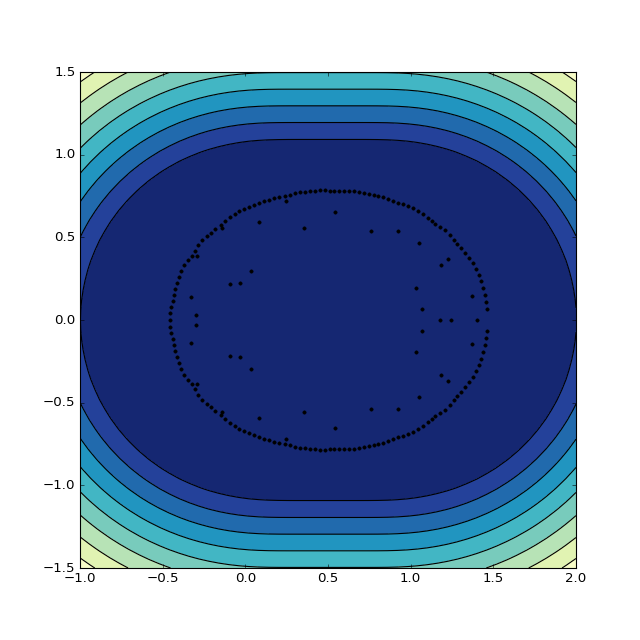

In [17]:
plt.figure(figsize=(8,8))
plot_pseudo_spec(x4, y4, A4, ps_spec4)
plt.show()

In [18]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()